In [47]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [48]:
images = []
labels = []

path = 'data/images'

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


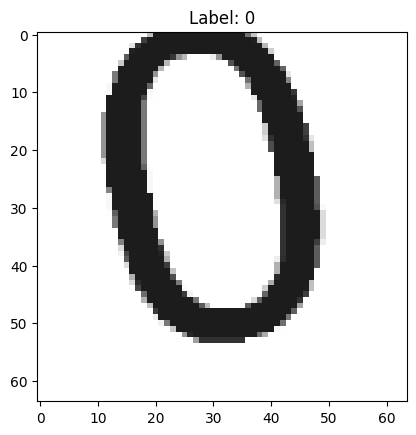

In [50]:
import matplotlib.pyplot as plt
# Display the image
plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.show()

In [51]:
X = np.array(images)
y = np.array(labels)
X.shape

(11089, 64, 64, 3)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [53]:
len(set(y))

33

In [54]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [58]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

ValueError: Input 0 of layer "conv2d_45" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 36)

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=16, epochs=40)

Epoch 1/50
555/555 [==============================] - 5s 10ms/step - loss: 0.0215 - accuracy: 0.9944 - val_loss: 0.0549 - val_accuracy: 0.9847
Epoch 2/50
555/555 [==============================] - 5s 9ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 5.6537e-05 - val_accuracy: 1.0000
Epoch 3/50
555/555 [==============================] - 5s 9ms/step - loss: 3.2805e-05 - accuracy: 1.0000 - val_loss: 2.5453e-05 - val_accuracy: 1.0000
Epoch 4/50
555/555 [==============================] - 5s 9ms/step - loss: 1.7682e-05 - accuracy: 1.0000 - val_loss: 1.4741e-05 - val_accuracy: 1.0000
Epoch 5/50
555/555 [==============================] - 5s 9ms/step - loss: 1.0734e-05 - accuracy: 1.0000 - val_loss: 1.0160e-05 - val_accuracy: 1.0000
Epoch 6/50
555/555 [==============================] - 5s 9ms/step - loss: 7.4190e-06 - accuracy: 1.0000 - val_loss: 6.5575e-06 - val_accuracy: 1.0000
Epoch 7/50
555/555 [==============================] - 5s 9ms/step - loss: 4.9236e-06 - accuracy: 1.0000 - val_l

In [31]:
model.save('trained_model4.h5')

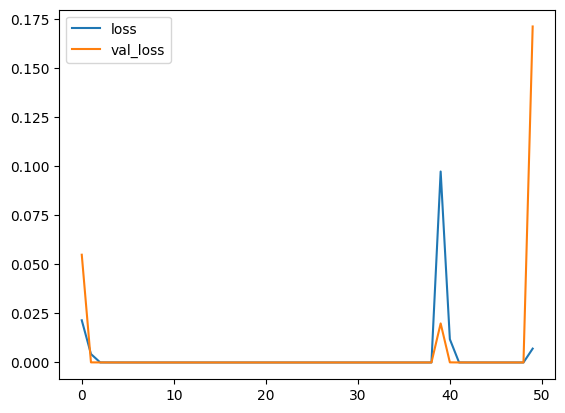

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [34]:
test_images = []
test_labels = []

path = 'data/testing_data'

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)

In [35]:
X_test = np.array(test_images)
y_test = np.array(test_labels)
X_test.shape

(1008, 64, 64, 3)

In [36]:
preds = model.predict(X_test)
preds.shape

32/32 [==============================] - 0s 6ms/step


(1008, 36)

In [37]:
# Inverse transform the predicted probabilities to get the original class labels
predicted_labels = le.inverse_transform(np.argmax(preds, axis=1))

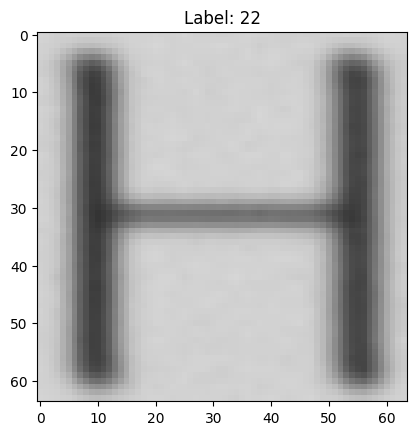

In [38]:
plt.imshow(X_test[500])
plt.title(f"Label: {predicted_labels[500]}")
plt.show()

In [40]:
y_test = le.fit_transform(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

32/32 [==============================] - 0s 6ms/step - loss: 4.2056 - accuracy: 0.2034
Test Accuracy: 0.2033730149269104


In [42]:


# Y_test'i LabelEncoder kullanarak dönüştürün (eğer daha önce dönüştürmediyseniz)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Modeli kullanarak tahmin yapın
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# Test seti üzerinde değerlendirme metriklerini hesaplayın
test_accuracy = accuracy_score(y_test_encoded, y_pred)
test_precision = precision_score(y_test_encoded, y_pred, average='weighted')
test_recall = recall_score(y_test_encoded, y_pred, average='weighted')
test_f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Sonuçları yazdırın
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

32/32 [==============================] - 0s 5ms/step
Test Accuracy: 0.20337301587301587
Test Precision: 0.22024062099651506
Test Recall: 0.20337301587301587
Test F1 Score: 0.17349511824872665


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
